In [1]:
import mot
import atom
import numpy as np
import copy
from numpy import sin,cos,e,pi,sqrt
from matplotlib import pyplot as plt

/home/user/repos/atomic-py/mot.py:158: RuntimeWarning: invalid value encountered in double_scalars
  Bx=Br*x/r
/home/user/repos/atomic-py/mot.py:159: RuntimeWarning: invalid value encountered in double_scalars
  By=Br*y/r


(nan, nan, 0.006122206479939054)
0.006826190504808455
[ 0.     0.    -0.037]


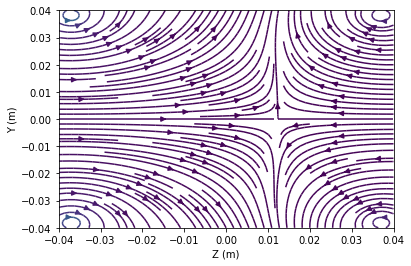

Coil #0:
Diameter: 0.08 meters
 turns*current: 116*6.50 amps
 origin: [ 0.     0.    -0.037]
Coil #1:
Diameter: 0.08 meters
 turns*current: 116*-2.50 amps
 origin: [0.    0.    0.037]

(49, 50, 65)
Field minimum @ x=-0.000,y=0.000, z=0.013
B=0.71 Gauss 
Relative trace error: 5.97E-05
Relative symmetry error: 1.15E-05


In [3]:
## Create a loop of wire
## Specify the diameter, number of turns, current, and origin (location of center)
loop=mot.magneticCoil(diameter=2*0.038,turns=48+68,current=6.5,origin=[0,0,-0.074/2])

#loop.field, and loop.fieldOnAxis for evaluating the field strength
print(loop.field(0,0,1))
print(loop.fieldOnAxis(1))

## Compare the analytic formula to the on-axis formula to verify no mistakes
#loop.consistencyCheck()

## Create a shifted copy
loop2=loop.copy()
loop2.shift([0,0,0.074])

# Change the current thru the second loop
loop2.current=-2.5
print(loop.origin)

## Create a mot coils system out of the two loops
coils=mot.coilSystem([loop,loop2])
## Create a rectangle about the origin for searching for field zeros
coils.setROI((-0.040,0.040,100j),(-0.040,0.040,100j))
coils.view()

## human readable description of the coil system
print(coils)

## Find the minimum field strength in the ROI
## Compute the gradient at this position
Grad_B=coils.gradient()
error=coils.symmetry_check(Grad_B)

In [4]:
## create a laser pointing along the -z direction
incoming_laser=mot.laser(intensity=10,polarization=+1,direction=[0,0,-1])
print(incoming_laser)

## Reflect off a mirror 45 deg from Z axis in YZ plane
reflected1=incoming_laser.reflect(0.9,[0,1,1])
print(reflected1)

## What if I used the wrong normal? Result should be the same
reflected2=incoming_laser.reflect(0.9,[0,-1,-1])
print(reflected2)

assert (reflected1.direction==reflected2.direction).all()

## Reflect off a mirror -45 deg from Z axis in YZ plane
reflected2=incoming_laser.reflect(0.9,[0,-1,1])
print(reflected2)


## Diffract off of a 45degree grating in the XY plane, with diffraction direction in the YZ plane
diff0,diff1=incoming_laser.diffract(efficiency=[0.1,0.4],bragg_direction=[0,sin(pi/8),cos(pi/8)])
print(diff0)
print(diff1)



Intensity=10.00 mW/cm^2
helicity=1
direction=[ 0.  0. -1.]

Intensity=9.00 mW/cm^2
helicity=-1
direction=[ 0.00e+00  1.00e+00 -2.22e-16]

Intensity=9.00 mW/cm^2
helicity=-1
direction=[ 0.00e+00  1.00e+00 -2.22e-16]

Intensity=9.00 mW/cm^2
helicity=-1
direction=[ 0.00e+00 -1.00e+00 -2.22e-16]

Intensity=1.00 mW/cm^2
helicity=-1
direction=[0. 0. 1.]

Intensity=5.66 mW/cm^2
helicity=-1
direction=[0.   0.71 0.71]



In [5]:
## Create an instance of the mot class by specifying:
    #the magnetic coil system
    #list of lasers
    #atomic transition
    #detuning (MHz)
    
Cs=atom.cesium()
badMOT=mot.mot(coils,[incoming_laser,reflected1,reflected2,diff0,diff1],Cs.D2,detuning=5)
print(badMOT)

## Since these lasers were constructed hap-hazardly, the radiation balance is bad
print(badMOT.balance)

*****MOT Class instance*****
***** Coil System *****
Coil #0:
Diameter: 0.08 meters
 turns*current: 116*6.50 amps
 origin: [ 0.     0.    -0.037]
Coil #1:
Diameter: 0.08 meters
 turns*current: 116*-2.50 amps
 origin: [0.    0.    0.037]
***** Laser system *****
Intensity=10.00 mW/cm^2
helicity=1
direction=[ 0.  0. -1.]
Intensity=9.00 mW/cm^2
helicity=-1
direction=[ 0.00e+00  1.00e+00 -2.22e-16]
Intensity=9.00 mW/cm^2
helicity=-1
direction=[ 0.00e+00 -1.00e+00 -2.22e-16]
Intensity=1.00 mW/cm^2
helicity=-1
direction=[0. 0. 1.]
Intensity=5.66 mW/cm^2
helicity=-1
direction=[0.   0.71 0.71]
detuning = 5.00
***** Atomic transition *****
FF=	2	3	4	5	
F=3	[[sqrt(70)/14 sqrt(6)/4 sqrt(210)/28 0]     *4.4786
F=4	 [0 sqrt(14)/12 sqrt(42)/12 sqrt(22)/6]]

[ 0.  4. -5.]


In [6]:
### Naive Cubic MOT example


## 3 pairs of mutually orthogonal beams
z0=mot.laser(intensity=10,polarization=-1,direction=[0,0,-1])
z1=z0.reflect(1,[0,0,1])
x0=mot.laser(intensity=10,polarization=-1,direction=[-1,0,0])
x1=x0.reflect(1,[1,0,0])
y0=mot.laser(intensity=10,polarization=-1,direction=[0,-1,0])
y1=y0.reflect(1,[0,1,0])
lasers=[z0,z1,x0,x1,y0,y1]

cubicMOT=mot.mot(coils,lasers,Cs.D2,detuning=10)

## This MOT is balanced by construction
print(cubicMOT.balance)

## doppler structure matrix
## Positive eigenvalues show that there is velocity trapping, i.e. cooling
print(cubicMOT.v_mat)

## magnetic structure matrix
## Zero eigenvalues show that there is no spatial confinement
print(cubicMOT.b_mat)

[0. 0. 0.]
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [7]:
### Correct Cubic MOT example


## 3 pairs of mutually orthogonal beams
z0=mot.laser(intensity=10,polarization=-1,direction=[0,0,-1])
## Additional HWP (usually a QWP double pass) is necessary
z1=z0.reflect(1,[0,0,1])
z1.polarization=-1*z1.polarization
x0=mot.laser(intensity=10,polarization=1,direction=[-1,0,0])
x1=x0.reflect(1,[1,0,0])
x1.polarization=-1*x1.polarization
y0=mot.laser(intensity=10,polarization=1,direction=[0,-1,0])
y1=y0.reflect(1,[0,1,0])
y1.polarization=-1*y1.polarization
lasers=[z0,z1,x0,x1,y0,y1]

cubicMOT=mot.mot(coils,lasers,Cs.D2,detuning=10)

## This MOT is balanced by construction
print(cubicMOT.balance)

## doppler structure matrix
## Positive eigenvalues show that there is velocity trapping, i.e. cooling
print(cubicMOT.v_mat)

## magnetic structure matrix
## Opposite sign eigenvalues between the XY, Z axes shows that trapping is possible
## If the field configuration is chosen correctly
print(cubicMOT.b_mat)


cubicMOT.view()

[0. 0. 0.]
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
[[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0. -2.]]


AttributeError: 'coilSystem' object has no attribute 'rs'

In [ ]:
cubicMOT.B0

In [ ]:
mask=coils.ys==np.min(np.abs(coils.ys))

In [ ]:
np.shape(coils.xs[:,:,1])

In [ ]:
np.shape(coils.ys)[0]/2

In [ ]:
coils.xs[:,3,:]

In [ ]:
x,y,z=np.meshgrid([0,1,2],[10,20,30],[100,200,300])

In [ ]:
x[:,:,0]

In [ ]:
y[:,0,:]

In [ ]:
z[:,0,:]

In [ ]:
Bx,By,Bz=coils.field(coils.xs,coils.ys,coils.zs)

## Take a cross-section for viewing
mask=coils.ys==np.min(np.abs(coils.ys))
middle_idx=int(np.shape(coils.xs)[0]/2)
By=By[:,middle_idx,:].transpose()
Bz=Bz[:,middle_idx,:].transpose()
Bx=Bx[:,middle_idx,:].transpose()

zs,ys=coils.zs[:,middle_idx,:].transpose(),coils.ys[:,middle_idx,:].transpose()

mag=sqrt(Bx**2+By**2+Bz**2)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.streamplot(ys,zs,By,Bz,density=1.5,color=mag)
ax.set(xlim=(ys.min(),ys.max() ), ylim=(ys.min(),zs.max()) )
plt.show()


In [ ]:
self=coils
Bx,By,Bz=self.field(self.xs,self.ys,self.zs)
mag=sqrt(Bx**2+By**2+Bz**2)
min_idx=np.unravel_index(np.argmin(mag),np.shape(mag))

print(f"Field minimum @ x={self.xs[min_idx]},y={self.ys[min_idx]}, z={self.zs[min_idx]}")
print(f"B={mag[min_idx]:.2f} Gauss ")

dx,dy,dz=self.xs[1,0,0]-self.xs[0,0,0],self.ys[0,1,0]-self.ys[0,0,0], self.zs[0,0,1]-self.zs[0,0,0]
Grad_Bx=np.array(np.gradient(Bx,dy,dx,dz))
Grad_By=np.array(np.gradient(By,dy,dx,dz))
Grad_Bz=np.array(np.gradient(Bz,dy,dx,dz))



np.vstack((
    Grad_Bx[(slice(None),*min_idx)],
    Grad_By[(slice(None),*min_idx)],
    Grad_Bz[(slice(None),*min_idx)])
)

In [ ]:
self.xs[min_idx]